# DAMA50: Mathematics for machine learning

## Written assignment 4

### Georgios Zavlanis


### Problem 7

First of all, we create our function:

In [2]:
%display latex

x = var('x')
Softplus(x) = ln(1 + exp(x)); Softplus(x)

log(e^x + 1)

(i) To answer the first query we do the following:

In [3]:
Taylor(x) = Softplus(x).series(x == 0, 11); Taylor

x |--> (log(2)) + 1/2*x + 1/8*x^2 + (-1/192)*x^4 + 1/2880*x^6 + (-17/645120)*x^8 + 31/14515200*x^10 + Order(x^11)

(ii) Let's create our plot first:

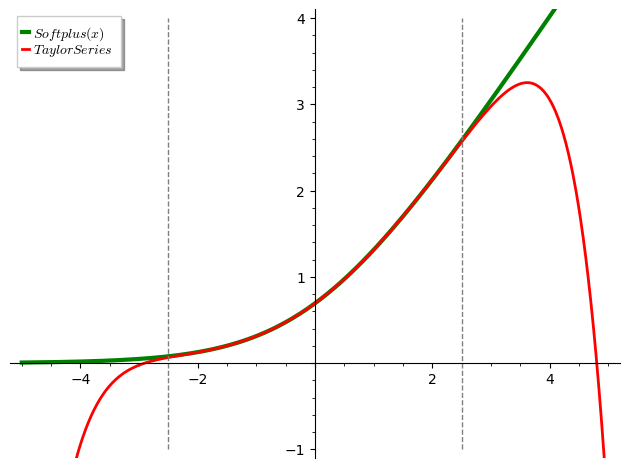

In [19]:

plot(Softplus(x), (x, -5, 5), ymin = -1, ymax = 4, color = 'green', legend_label = '$Softplus(x)$', thickness = 3) +\
plot(Taylor(x), (x, -5, 5), ymin = -1, ymax = 4, color = 'red', legend_label = '$Taylor Series$', thickness = 2) +\
line([(-2.5, -1), (-2.5, 4)], color = 'gray', linestyle= 'dashed') +\
line([(2.5, -1),(2.5, 4)], color = 'gray', linestyle= 'dashed')

We can see that the region between the two vertical dashed lines, is the region where the approximation that
created by the Taylor series expansion, completely coincides with the original Softplus function.

(iii) For the third query we can write the following:

In [4]:
derivative(Softplus(x), x)

e^x/(e^x + 1)

(iv) Now, for the fourth query, we must use the approximation from the taylor series expansion, so we can write:

In [4]:
derivative(Softplus(x).series(x, 11))

1/2 + 1/4*x + (-1/48)*x^3 + 1/480*x^5 + (-17/80640)*x^7 + 31/1451520*x^9 + Order(x^10)

(v) We create our plot:

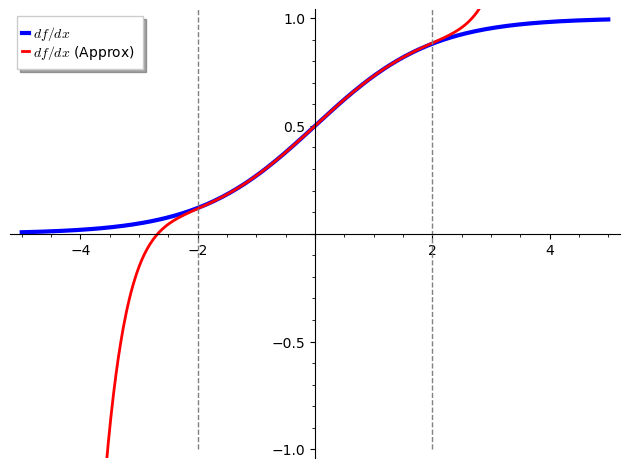

In [5]:
plot(derivative(Softplus(x), x), (x, -5, 5), ymin = -1, ymax = 1, color = 'blue', legend_label = '$df/dx$', 
     thickness = 3) +\
plot(derivative(Taylor(x), x), (x, -5, 5), ymin = -1, ymax = 1, color = 'red', legend_label = '$df/dx$ (Approx)', 
     thickness = 2) +\
line([(-2, -1), (-2, 4)], color = 'gray', linestyle= 'dashed') +\
line([(2, -1),(2, 4)], color = 'gray', linestyle= 'dashed')

Again, we can see that the region between the two vertical dashed lines, is the region where the approximation that
created by the derivative of Taylor series expansion, completely coincides with the original derivative of the Softplus function.

### Problem 8

a. First we install the necessary packages, writing the following:

In [7]:
# the code shell from the tutorial file of Unit 4
try :
    import autograd
    print ("Autograd is already installed!")
except :
    print ("Installing autograd.")
    !pip install autograd
    
import autograd.numpy as np
from autograd import grad

Autograd is already installed!


b. Then we write the necessary settings:

In [8]:
def pyf(w):
    w0, w1, w2, x0, x1 = w
    return 1/(1 + np.exp(-(w0*x0 + w1*x1 + w2)))

augradf = grad(pyf)

c. For this query, we can write the following:

In [9]:
w0, w1, w2, x0, x1 = var('w0, w1, w2, x0, x1')
f(w0, w1, w2, x0, x1) = 1/(1 + exp(-(w0*x0 + w1*x1 + w2)))


angradf = f.gradient([w0, w1, w2, x0, x1]); f(w0, w1, w2, x0, x1)

1/(e^(-w0*x0 - w1*x1 - w2) + 1)

d. After the definition of all the functions, it's time to make our calculations:

First, we must create the samples that will be used:

In [10]:
sample1 = [random() for i in range(5)] ; sample1

[0.3831607466129532,
 0.682233961828276,
 0.9385245440219384,
 0.3328680682518854,
 0.8649063651049232]

In [11]:
sample2 = [random() for i in range(5)]; sample2

[0.6539241523758039,
 0.990089550069183,
 0.49107585916929286,
 0.8091436069232276,
 0.10800758522901366]

First, we show the results for the Python function:

In [12]:
augradf(np.array(sample1))

array([0.04480116, 0.11640891, 0.13459135, 0.05157012, 0.09182279])

In [13]:
augradf(np.array(sample2))

array([0.14954368, 0.01996166, 0.18481724, 0.12085645, 0.18298561])

Then, for the Sagemath function, using the same samples:

In [14]:
angradf(sample1[0], sample1[1], sample1[2], sample1[3], sample1[4])

(0.04480116126423311, 0.11640891162983419, 0.13459134575303122, 0.05157012052637357, 0.0918227870408898)

In [15]:
angradf(sample2[0], sample2[1], sample2[2], sample2[3], sample2[4])

(0.149543684277902, 0.0199616632781957, 0.1848172351587162, 0.12085645384560313, 0.1829856132033237)

As we can see the two gradient functions, give the same results every time we run the scripts. The only different is that the Sagemath function make the calculations for more decimals and thus we have a little greater accuracy. But this is something that we can configure when we define our functions.

e. For this last query, all we have to do is the following:

In [16]:
# create another random sample
sample3 = [random() for i in range(5)]

# execution time for Python function
%timeit augradf(np.array(sample3))

600 µs ± 27.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [17]:
# execution time for Sagemath function
%timeit angradf(sample3[0], sample3[1], sample3[2], sample3[3], sample3[4])

1.29 ms ± 61.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We can easily observe that the execution time of the sagemath function is bigger (1.36 milliseconds or 1360 microseconds) than the execution time of the Python function (only 651 microseconds). The Python function almost executed in the half of execution time of Sagemath function.